In [95]:
import pandas as pd
import numpy as np

In [96]:
df = pd.read_csv("coffee.csv", header=None, names=["class", "content"])
df.head(10)

,class,content
0,Hot,Coffee Tea Soup Coffee Coffee
1,Hot,Coffee is hot and so is Soup and Tea
2,Hot,Espresso is a hot Coffee and not a Tea
3,Hot,Coffee is neither Tea nor Soup
4,Cold,Sprite Pepsi Cold Coffee and cold Tea


In [97]:
# Convert class to numerical variables
df['class'] = df['class'].map({'Hot': 1, 'Cold': 0})
df.head(10)

,class,content
0,1,Coffee Tea Soup Coffee Coffee
1,1,Coffee is hot and so is Soup and Tea
2,1,Espresso is a hot Coffee and not a Tea
3,1,Coffee is neither Tea nor Soup
4,0,Sprite Pepsi Cold Coffee and cold Tea


In [98]:
X_train = df['content']
y_train = df['class']


In [110]:
from sklearn.feature_extraction.text import CountVectorizer

vector_1 = CountVectorizer(stop_words='english')
vector_1.fit(X_train)

# len(vector_1.vocabulary_)

vector_1.vocabulary_

{'coffee': 0,
 'tea': 7,
 'soup': 5,
 'hot': 3,
 'espresso': 2,
 'sprite': 6,
 'pepsi': 4,
 'cold': 1}

In [100]:
test_df = pd.read_csv("test.csv", header=None, names=["class", "content"])
test_df['class'] = test_df['class'].map({'Cold': 0, 'Hot': 1})
X_test = test_df['content']
y_test = test_df['class']


X_test_transformed = vector_1.transform(X_test.values)
pd.DataFrame(X_test_transformed.toarray(), 
             columns=vector_1.get_feature_names_out())

,coffee,cold,espresso,hot,pepsi,soup,sprite,tea
0,2,1,0,1,0,0,0,1


In [101]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [102]:
X_train_transformed = vector_1.transform(X_train)
pd.DataFrame(X_train_transformed.toarray(), 
             columns=vector_1.get_feature_names_out())

,coffee,cold,espresso,hot,pepsi,soup,sprite,tea
0,3,0,0,0,0,1,0,1
1,1,0,0,1,0,1,0,1
2,1,0,1,1,0,0,0,1
3,1,0,0,0,0,1,0,1
4,1,2,0,0,1,0,1,1


In [103]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

# Fit model with train dataset
mnb = mnb.fit(X_train_transformed, y_train)

# Do prediction
mnb_predict = mnb.predict(X_test_transformed)

# Test dataset
mnb_prob = mnb.predict_proba(X_test_transformed)

print(mnb_prob)

[[0.10782733 0.89217267]]


In [104]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

# Fit model with train dataset
bnb = bnb.fit(X_train_transformed, y_train)


bnb_predict = bnb.predict(X_test_transformed)

# Test dataset
bnb_prob = bnb.predict_proba(X_test_transformed)

print(bnb_prob)

[[0.12013139 0.87986861]]


## Model Evaluation

In [105]:
from sklearn import metrics

mnb_accuracy_score = metrics.accuracy_score(y_test, mnb_predict)

bnb_accuracy_score = metrics.accuracy_score(y_test, bnb_predict)


print(f"\nMNB Accuracy: {mnb_accuracy_score}")

print(f"\nBNB Accuracy: {bnb_accuracy_score}")


MNB Accuracy: 1.0

BNB Accuracy: 1.0


In [106]:
mnb_confusion_matrix = metrics.confusion_matrix(y_test, mnb_predict)
bnb_confusion_matrix = metrics.confusion_matrix(y_test, bnb_predict)

print(f"\nMNB Confusion Matrix:\n {mnb_confusion_matrix}")

print(f"\nBNB Confusion Matrix:\n {bnb_confusion_matrix}")


MNB Confusion Matrix:
 [[1]]

BNB Confusion Matrix:
 [[1]]


In [107]:
def evaluate_model(y_test: np.array, y_predict: np.array):

    from sklearn import metrics

    confusion_matrix = metrics.confusion_matrix(y_test, y_predict)


    # Get values
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    TP = confusion_matrix[1, 1]


    sensitivity = TP / float(FN + TP)
    print("sensitivity",sensitivity)

    specificity = TN / float(TN + FP)
    print("specificity",specificity)

    precision = TP / float(TP + FP)
    print("precision",precision)

    print("PRECISION SCORE :",metrics.precision_score(y_test, y_predict))
    print("RECALL SCORE :", metrics.recall_score(y_test, y_predict))
    print("F1 SCORE :",metrics.f1_score(y_test, y_predict))



In [108]:
# Evaluate MNB model
evaluate_model(y_test=y_test, y_predict=mnb_predict)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
# Evaluate BNB model
evaluate_model(y_test=y_test, y_predict=bnb_predict)

sensitivity 0.0
specificity nan
precision nan
PRECISION SCORE : 0.0
RECALL SCORE : 0.0
F1 SCORE : 0.0


/var/folders/sr/y9ng7km55ds5p79vxk5n2kw40000gn/T/ipykernel_7050/1384818502.py:18: RuntimeWarning: invalid value encountered in divide
  specificity = TN / float(TN + FP)
/var/folders/sr/y9ng7km55ds5p79vxk5n2kw40000gn/T/ipykernel_7050/1384818502.py:21: RuntimeWarning: invalid value encountered in divide
  precision = TP / float(TP + FP)
/Users/geotech/Documents/max/upgrad/course_4/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def create_roc_curve(y_test: np.array, y_predict_prob: np.array):

    # creating an ROC curve
    import pandas as pd
    from sklearn.metrics import confusion_matrix as sk_confusion_matrix
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict_prob[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print(f"\nroc_auc: {roc_auc}")

    matrix_threshold = pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })
    
    print(f"\nmatrix_threshold: \n {matrix_threshold}")


    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate)

    plt.show()
    



roc_auc: nan

matrix_threshold: 
    Threshold  TPR  FPR
0        inf  0.0  NaN
1   0.107827  1.0  NaN


/Users/geotech/Documents/max/upgrad/course_4/venv/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1124: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


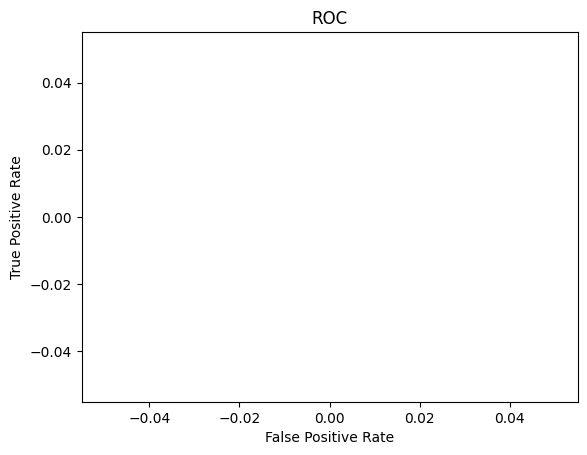

In [ ]:
# Calculate ROC curse for MNB model
create_roc_curve(y_test=y_test, y_predict_prob=mnb_prob)


roc_auc: nan

matrix_threshold: 
    Threshold  TPR  FPR
0        inf  0.0  NaN
1   0.120131  1.0  NaN


/Users/geotech/Documents/max/upgrad/course_4/venv/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1124: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


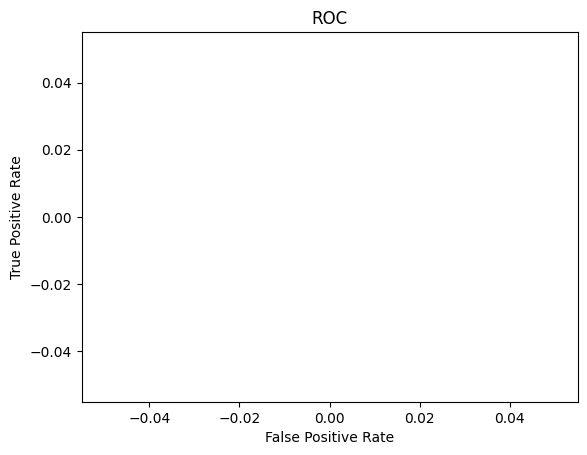

In [ ]:
# Calculate ROC curse for BNB model
create_roc_curve(y_test=y_test, y_predict_prob=bnb_prob)

In [113]:
from fractions import Fraction

p_red_A = Fraction(3, 7)
p_green_A = Fraction(4, 7)
p_red_B = Fraction(4, 10)
p_green_B = Fraction(6, 10)

p_A = Fraction(1, 2)
p_B = Fraction(1, 2)

p_red = Fraction(7, 17)
p_green = Fraction(10, 17)



p_A_green = p_green_A * p_A / p_green
print(float(p_A_green))

0.4857142857142857


In [114]:
from fractions import Fraction

p_blue_A = Fraction(4, 10)
p_green_A = Fraction(6, 10)

p_blue_B = Fraction(6, 10)
p_green_B = Fraction(4, 10)

p_blue_B = Fraction(5, 10)
p_green_C = Fraction(5, 10)

p_A = Fraction(1, 3)
p_B = Fraction(1, 3)
p_C = Fraction(1, 3)


p_blue = Fraction(15, 30)
p_green = Fraction(15, 30)



p_A_green = p_green_A * p_A / p_green
print(float(p_A_green))

0.4


In [120]:
p_dl_female = 50/90 * 90/500 / (240/500)
p_dl_and_female = 50 / 500
p_dl_and_female > p_dl_female

False

In [121]:
p_dl_female

0.20833333333333334

In [124]:
Fraction(3, 15) * Fraction(15, 50) / Fraction(10, 50)

0.24